### 🔧 环境配置和检查

#### 概述

本教程需要特定的环境配置以确保最佳学习体验。以下配置将帮助你：

- 使用统一的conda环境：激活统一的学习环境
- 通过国内镜像源快速安装依赖：配置pip使用清华镜像源
- 加速模型下载：设置HuggingFace镜像代理
- 检查系统配置：检查硬件和软件配置

#### 配置

- **所需环境及其依赖已经部署好**
- 在`Notebook`右上角选择`jupyter内核`为`python(agent101)`，即可执行下方代码

In [1]:
%%script bash

# 1. 激活 conda 环境 (仅对当前单元格有效)
eval "$(conda shell.bash hook)"
conda activate agent101

echo "========================================="
echo "== Conda 环境检查报告 (仅针对当前 Bash 子进程) =="
echo "========================================="

# 2. 检查当前激活的环境
CURRENT_ENV_NAME=$(basename $CONDA_PREFIX)

if [ "$CURRENT_ENV_NAME" = "agent101" ]; then
    echo "✅ 当前单元格已成功激活到 agent101 环境。"
    echo "✅ 正在使用的环境路径: $CONDA_PREFIX"
    echo ""
    echo "💡 提示: 后续的Python单元格将使用Notebook当前选择的Jupyter内核。"
    echo "   如果需要后续单元格也使用此环境，请执行以下操作:"
    echo "   1. 检查 Notebook 右上角是否已选择 'python(agent101)'。"
else
    echo "❌ 激活失败或环境名称不匹配。当前环境: $CURRENT_ENV_NAME"
    echo ""
    echo "⚠️ 严重提示: 建议将 Notebook 的 Jupyter **内核 (Kernel)** 切换为 'python(agent101)'。"
    echo "   (通常位于 Notebook 右上角或 '内核' 菜单中)"
    echo ""
    echo "📚 备用方法 (不推荐): 如果无法切换内核，则必须在**每个**代码单元格的头部重复以下命令:"
    echo ""
    echo "%%script bash"
    echo "# 必须在每个单元格都执行"
    echo "eval \"\$(conda shell.bash hook)\""
    echo "conda activate agent101"
fi

echo "=========================================" 

== Conda 环境检查报告 (仅针对当前 Bash 子进��) ==
✅ 当前单元格已成功激活到 agent101 环境。
✅ 正在使用的环境路径: /root/miniconda3/envs/agent101

💡 提示: 后续的Python单元格将使用Notebook当前选择的Jupyter��核。
   如果需要后续单元格也使用此环境，请执行以下操作:
   1. 检查 Notebook 右上角是否已选择 'python(agent101)'。


In [2]:
# 2. 设置pip 为清华源
%pip config list -v set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple
%pip config list -v list


For variant 'global', will try loading '/etc/xdg/pip/pip.conf'
For variant 'global', will try loading '/etc/pip.conf'
For variant 'user', will try loading '/root/.pip/pip.conf'
For variant 'user', will try loading '/root/.config/pip/pip.conf'
For variant 'site', will try loading '/root/miniconda3/envs/agent101/pip.conf'
ERROR: Got unexpected number of arguments, expected 0. (example: "/root/miniconda3/envs/agent101/bin/python -m pip config list")
Note: you may need to restart the kernel to use updated packages.
For variant 'global', will try loading '/etc/xdg/pip/pip.conf'
For variant 'global', will try loading '/etc/pip.conf'
For variant 'user', will try loading '/root/.pip/pip.conf'
For variant 'user', will try loading '/root/.config/pip/pip.conf'
For variant 'site', will try loading '/root/miniconda3/envs/agent101/pip.conf'
ERROR: Got unexpected number of arguments, expected 0. (example: "/root/miniconda3/envs/agent101/bin/python -m pip config list")
Note: you may need to restart th

In [3]:
# 3. 设置HuggingFace代理
%env HF_ENDPOINT=https://hf-mirror.com
# 验证：使用shell命令检查
!echo $HF_ENDPOINT

env: HF_ENDPOINT=https://hf-mirror.com
https://hf-mirror.com


In [4]:
# 🔍 环境信息检查脚本
#
# 本脚本的作用：
# 1. 安装 pandas 库用于数据表格展示
# 2. 检查系统的各项配置信息
# 3. 生成详细的环境报告表格
#
# 对于初学者来说，这个步骤帮助你：
# - 了解当前运行环境的硬件配置
# - 确认是否满足模型运行的最低要求
# - 学习如何通过代码获取系统信息

# 安装 pandas 库 - 用于创建和展示数据表格
# pandas 是 Python 中最流行的数据处理和分析库
%pip install pandas==2.2.2 tabulate==0.9.0

import platform # 导入 platform 模块以获取系统信息
import os # 导入 os 模块以与操作系统交互
import subprocess # 导入 subprocess 模块以运行外部命令
import pandas as pd # 导入 pandas 模块，通常用于数据处理，这里用于创建表格
import shutil # 导入 shutil 模块以获取磁盘空间信息

# 获取 CPU 信息的函数，包括核心数量
def get_cpu_info():
    cpu_info = "" # 初始化 CPU 信息字符串
    physical_cores = "N/A"
    logical_cores = "N/A"

    if platform.system() == "Windows": # 如果是 Windows 系统
        cpu_info = platform.processor() # 使用 platform.processor() 获取 CPU 信息
        try:
            # 获取 Windows 上的核心数量 (需要 WMI)
            import wmi
            c = wmi.WMI()
            for proc in c.Win32_Processor():
                physical_cores = proc.NumberOfCores
                logical_cores = proc.NumberOfLogicalProcessors
        except:
            pass # 如果 WMI 不可用，忽略错误

    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取 CPU 信息和核心数量
        os.environ['PATH'] = os.environ['PATH'] + os.pathsep + '/usr/sbin' # 更新 PATH 环境变量
        try:
            process_brand = subprocess.Popen(['sysctl', "machdep.cpu.brand_string"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_brand, stderr_brand = process_brand.communicate()
            cpu_info = stdout_brand.decode().split(': ')[1].strip() if stdout_brand else "Could not retrieve CPU info"

            process_physical = subprocess.Popen(['sysctl', "hw.physicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_physical, stderr_physical = process_physical.communicate()
            physical_cores = stdout_physical.decode().split(': ')[1].strip() if stdout_physical else "N/A"

            process_logical = subprocess.Popen(['sysctl', "hw.logicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_logical, stderr_logical = process_logical.communicate()
            logical_cores = stdout_logical.decode().split(': ')[1].strip() if stdout_logical else "N/A"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/cpuinfo 文件获取 CPU 信息和核心数量
            with open('/proc/cpuinfo') as f:
                physical_cores_count = 0
                logical_cores_count = 0
                cpu_info_lines = []
                for line in f:
                    if line.startswith('model name'): # 查找以 'model name'开头的行
                        if not cpu_info: # 只获取第一个 model name
                            cpu_info = line.split(': ')[1].strip()
                    elif line.startswith('cpu cores'): # 查找以 'cpu cores' 开头的行
                        physical_cores_count = int(line.split(': ')[1].strip())
                    elif line.startswith('processor'): # 查找以 'processor' 开头的行
                        logical_cores_count += 1
                physical_cores = str(physical_cores_count) if physical_cores_count > 0 else "N/A"
                logical_cores = str(logical_cores_count) if logical_cores_count > 0 else "N/A"
                if not cpu_info:
                     cpu_info = "Could not retrieve CPU info"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    return f"{cpu_info} ({physical_cores} physical cores, {logical_cores} logical cores)" # 返回 CPU 信息和核心数量


# 获取内存信息的函数
def get_memory_info():
    mem_info = "" # 初始化内存信息字符串
    if platform.system() == "Windows":
        # 在 Windows 上不容易通过标准库获取，需要外部库或 PowerShell
        mem_info = "Requires external tools on Windows" # 设置提示信息
    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取内存大小
        process = subprocess.Popen(['sysctl', "hw.memsize"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) # 运行 sysctl 命令
        stdout, stderr = process.communicate() # 获取标准输出和标准错误
        mem_bytes = int(stdout.decode().split(': ')[1].strip()) # 解析输出，获取内存大小（字节）
        mem_gb = mem_bytes / (1024**3) # 转换为 GB
        mem_info = f"{mem_gb:.2f} GB" # 格式化输出
    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/meminfo 文件获取内存信息
            with open('/proc/meminfo') as f:
                total_mem_kb = 0
                available_mem_kb = 0
                for line in f:
                    if line.startswith('MemTotal'): # 查找以 'MemTotal' 开头的行
                        total_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取总内存（KB）
                    elif line.startswith('MemAvailable'): # 查找以 'MemAvailable' 开头的行
                         available_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取可用内存（KB）

                if total_mem_kb > 0:
                    total_mem_gb = total_mem_kb / (1024**2) # 转换为 GB
                    mem_info = f"{total_mem_gb:.2f} GB" # 格式化输出总内存
                    if available_mem_kb > 0:
                        available_mem_gb = available_mem_kb / (1024**2)
                        mem_info += f" (Available: {available_mem_gb:.2f} GB)" # 添加可用内存信息
                else:
                     mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息

        except:
            mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息
    return mem_info # 返回内存信息

# 获取 GPU 信息的函数，包括显存
def get_gpu_info():
    try:
        # 尝试使用 nvidia-smi 获取 NVIDIA GPU 信息和显存
        result = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total', '--format=csv,noheader'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            gpu_lines = result.stdout.strip().split('\n') # 解析输出，获取 GPU 名称和显存
            gpu_info_list = []
            for line in gpu_lines:
                name, memory = line.split(', ')
                gpu_info_list.append(f"{name} ({memory})") # 格式化 GPU 信息
            return ", ".join(gpu_info_list) if gpu_info_list else "NVIDIA GPU found, but info not listed" # 返回 GPU 信息或提示信息
        else:
             # 尝试使用 lshw 获取其他 GPU 信息 (需要安装 lshw)
            try:
                result_lshw = subprocess.run(['lshw', '-C', 'display'], capture_output=True, text=True)
                if result_lshw.returncode == 0: # 如果命令成功执行
                     # 简单解析输出中的 product 名称和显存
                    gpu_info_lines = []
                    current_gpu = {}
                    for line in result_lshw.stdout.splitlines():
                        if 'product:' in line:
                             if current_gpu:
                                 gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")
                             current_gpu = {'product': line.split('product:')[1].strip()}
                        elif 'size:' in line and 'memory' in line:
                             current_gpu['memory'] = line.split('size:')[1].strip()

                    if current_gpu: # 添加最后一个 GPU 的信息
                        gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")

                    return ", ".join(gpu_info_lines) if gpu_info_lines else "GPU found (via lshw), but info not parsed" # 如果找到 GPU 但信息无法解析，设置提示信息
                else:
                    return "No GPU found (checked nvidia-smi and lshw)" # 如果两个命令都找不到 GPU，设置提示信息
            except FileNotFoundError:
                 return "No GPU found (checked nvidia-smi, lshw not found)" # 如果找不到 lshw 命令，设置提示信息
    except FileNotFoundError:
        return "No GPU found (nvidia-smi not found)" # 如果找不到 nvidia-smi 命令，设置提示信息


# 获取 CUDA 版本的函数
def get_cuda_version():
    try:
        # 尝试使用 nvcc --version 获取 CUDA 版本
        result = subprocess.run(['nvcc', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            for line in result.stdout.splitlines():
                if 'release' in line: # 查找包含 'release' 的行
                    return line.split('release ')[1].split(',')[0] # 解析行，提取版本号
        return "CUDA not found or version not parsed" # 如果找不到 CUDA 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "CUDA not found" # 如果找不到 nvcc 命令，设置提示信息

# 获取 Python 版本的函数
def get_python_version():
    return platform.python_version() # 获取 Python 版本

# 获取 Conda 版本的函数
def get_conda_version():
    try:
        # 尝试使用 conda --version 获取 Conda 版本
        result = subprocess.run(['conda', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            return result.stdout.strip() # 返回 Conda 版本
        return "Conda not found or version not parsed" # 如果找不到 Conda 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "Conda not found" # 如果找不到 conda 命令，设置提示信息

# 获取物理磁盘空间信息的函数
def get_disk_space():
    try:
        total, used, free = shutil.disk_usage("/") # 获取根目录的磁盘使用情况
        total_gb = total / (1024**3) # 转换为 GB
        used_gb = used / (1024**3) # 转换为 GB
        free_gb = free / (1024**3) # 转换为 GB
        return f"Total: {total_gb:.2f} GB, Used: {used_gb:.2f} GB, Free: {free_gb:.2f} GB" # 格式化输出
    except Exception as e:
        return f"Could not retrieve disk info: {e}" # 如果获取信息出错，设置错误信息

# 获取环境信息
os_name = platform.system() # 获取操作系统名称
os_version = platform.release() # 获取操作系统版本
if os_name == "Linux":
    try:
        # 在 Linux 上尝试获取发行版和版本
        lsb_info = subprocess.run(['lsb_release', '-a'], capture_output=True, text=True)
        if lsb_info.returncode == 0: # 如果命令成功执行
            for line in lsb_info.stdout.splitlines():
                if 'Description:' in line: # 查找包含 'Description:' 的行
                    os_version = line.split('Description:')[1].strip() # 提取描述信息作为版本
                    break # 找到后退出循环
                elif 'Release:' in line: # 查找包含 'Release:' 的行
                     os_version = line.split('Release:')[1].strip() # 提取版本号
                     # 尝试获取 codename
                     try:
                         codename_info = subprocess.run(['lsb_release', '-c'], capture_output=True, text=True)
                         if codename_info.returncode == 0:
                             os_version += f" ({codename_info.stdout.split(':')[1].strip()})" # 将 codename 添加到版本信息中
                     except:
                         pass # 如果获取 codename 失败则忽略

    except FileNotFoundError:
        pass # lsb_release 可能未安装，忽略错误

full_os_info = f"{os_name} {os_version}" # 组合完整的操作系统信息
cpu_info = get_cpu_info() # 调用函数获取 CPU 信息和核心数量
memory_info = get_memory_info() # 调用函数获取内存信息
gpu_info = get_gpu_info() # 调用函数获取 GPU 信息和显存
cuda_version = get_cuda_version() # 调用函数获取 CUDA 版本
python_version = get_python_version() # 调用函数获取 Python 版本
conda_version = get_conda_version() # 调用函数获取 Conda 版本
disk_info = get_disk_space() # 调用函数获取物理磁盘空间信息


# 创建用于存储数据的字典
env_data = {
    "项目": [ # 项目名称列表
        "操作系统",
        "CPU 信息",
        "内存信息",
        "GPU 信息",
        "CUDA 信息",
        "Python 版本",
        "Conda 版本",
        "物理磁盘空间" # 添加物理磁盘空间
    ],
    "信息": [ # 对应的信息列表
        full_os_info,
        cpu_info,
        memory_info,
        gpu_info,
        cuda_version,
        python_version,
        conda_version,
        disk_info # 添加物理磁盘空间信息
    ]
}

# 创建一个 pandas DataFrame
df = pd.DataFrame(env_data)

# 打印表格
print("### 环境信息") # 打印标题
print(df.to_markdown(index=False)) # 将 DataFrame 转换为 Markdown 格式并打印，不包含索引


Note: you may need to restart the kernel to use updated packages.
### 环境信息
| 项目         | 信息                                                                               |
|:-------------|:-----------------------------------------------------------------------------------|
| 操作系统     | Linux Ubuntu 22.04.4 LTS                                                           |
| CPU 信息     | 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz (1 physical cores, 4 logical cores) |
| 内存信息     | 5.75 GB (Available: 2.54 GB)                                                       |
| GPU 信息     | No GPU found (nvidia-smi not found)                                                |
| CUDA 信息    | CUDA not found                                                                     |
| Python 版本  | 3.10.18                                                                            |
| Conda 版本   | conda 24.4.0                                                                       |
| 物理磁盘空间 | Total: 145.49 GB, 

# 过滤与裁剪对话消息（Filtering and Trimming Messages）

## 回顾

到目前为止，我们已经进一步理解了以下内容：

- 如何自定义图状态（Graph State）的数据结构（Schema）
- 如何定义自定义的状态归约器器（State Reducers）
- 如何在一个项目中使用多种图状态 Schema

## 目标

接下来，我们将在 LangGraph 中把这些概念用于实际模型调用。

在后续章节里，我们会逐步构建一个支持长期记忆的聊天机器人。

**因为机器人依赖消息来对话，我们先介绍在图状态中处理消息的几种高级方式：过滤（Filter）与裁剪（Trim）。**

In [5]:
# %%capture --no-stderr
%pip install --quiet langchain_openai==0.3.32 langchain_core==0.3.75 langgraph==0.6.7

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os, getpass

# 小工具：若环境变量未设置，则在运行时提示手动输入并写入到进程环境变量
# 生产环境建议通过更安全的方式（如 .env、密钥管理服务、CI/CD 注入）设置

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# OpenAI API 密钥（用于 ChatOpenAI 调用）
_set_env("OPENAI_API_KEY")
# 设置 OpenAI API代理地址 (例如：https://api.apiyi.com/v1）
_set_env("OPENAI_BASE_URL")

我们将使用 [LangSmith](https://docs.smith.langchain.com/) 进行[调用追踪（tracing）](https://docs.smith.langchain.com/concepts/tracing)。

本笔记会将追踪数据记录到项目 `langchain-academy` 中。

In [7]:
# LangSmith 用于链路追踪与可视化分析
_set_env("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = "true"
# 指定追踪项目名，便于区分不同实验/环境
os.environ["LANGSMITH_PROJECT"] = "FlyAIBox"

## 将消息作为状态（Messages as State）

首先，我们先定义一些对话消息。

In [8]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

# 定义一组对话消息（先是 AI，再是人类），用于后续示例
messages = [AIMessage(f"你之前说你在研究海洋哺乳动物，对吗？", name="Bot")]
messages.append(HumanMessage(f"是的，我知道鲸鱼。但我还应该了解哪些其他的？", name="Lance"))
# 以更易读的格式打印消息，便于调试与理解
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

你之前说你在研究海洋哺乳动物，对吗？
================================ Human Message =================================
Name: Lance

是的，我知道鲸鱼。但我还应该了解哪些其他的？


回顾一下：我们可以直接把这组消息传给聊天模型。

In [9]:
from langchain_openai import ChatOpenAI

# 初始化聊天模型；gpt-4o 仅为示例，可根据账号权限与成本选择其他模型
llm = ChatOpenAI(model="gpt-4o")

# 直接将完整消息历史传入模型（注意：长对话会推高 token 与延迟）
llm.invoke(messages)

AIMessage(content='除了鲸鱼，海洋哺乳动物是一类非常迷人的生物，还有许多其他种类可以研究和了解。以下是一些主要的海洋哺乳动物种类：\n\n### 1. **海豚**\n   - 海豚属于鲸类，但通常比鲸鱼体型较小。它们是高度社会化的生物，以智能和复杂的行为著称。\n   - 常见种类包括瓶鼻海豚和斑海豚。\n\n### 2. **海豹**\n   - 海豹是鳍足类的成员，适应水中生活，但必须上岸进行休息和繁殖。\n   - 有些常见的种类包括斑海豹和灰海豹。\n\n### 3. **海狮**\n   - 与海豹类似，但海狮的前鳍更有力，允许它们在陆地上“走”而不是爬。\n   - 它们通常比海豹更活跃且更吵闹。\n\n### 4. **海象**\n   - 海象是巨大的鳍足类动物，拥有显著的长獠牙，它们用于打斗、挖掘海床或攀爬冰面。\n\n### 5. **儒艮和海牛**\n   - 儒艮和海牛是草食性海洋哺乳动物，常被称为“海洋中的温柔巨人”。\n   - 儒艮生活在印度洋及其周边区域，而海牛（比如西印度海牛）在北美洲地区较为常见。\n\n### 6. **北极熊**\n   - 虽然北极熊不是水生动物，但它们是依赖海洋生态系统生活的哺乳动物，尤其是冰面和猎取海豹。\n\n### 7. **水獭**\n   - 海獭是一种小型哺乳动物，它们主要生活在海洋中，但与淡水水獭有些相似。\n   - 它们以使用工具而闻名，比如利用石头打开贝壳。\n\n### 8. **长须鲸（鳍足鲸类）**\n   - 除了小型鲸鱼，还有大型鲸鱼，比如座头鲸、蓝鲸，以及长须鲸。\n\n研究海洋哺乳动物时，可以注意它们的迁徙、繁殖习性、生态角色以及如何保护它们免受人类活动的负面影响。例如，塑料垃圾和海洋污染对许多海洋哺乳动物产生了巨大威胁。\n\n如果你对某一类特别有兴趣，我可以提供更多深度信息！', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 585, 'prompt_tokens': 45, 'total_tokens': 630, 'completion_tokens_details': {'accepted_predicti

我们可以在一个使用 `MessagesState` 的简单图（Graph）里运行聊天模型。

图可视化：


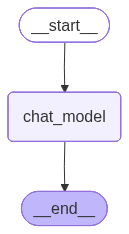

✅ 图渲染成功！


In [10]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

# 定义一个图节点：接收状态中的所有消息，直接调用聊天模型
# 注意：此处未做任何过滤/裁剪，长对话会不断增长
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

# 构建最简图：START -> chat_model -> END
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# 展示图结构
# 图可视化
print("图可视化：")

# 方案1：尝试使用 Pyppeteer 本地渲染（推荐）
try:
    # 可视化：通过 Mermaid 渲染图结构
    display(Image(graph.get_graph().draw_mermaid_png()))
    print("✅ 图渲染成功！")
except Exception as e:
    print(f"❌ Pyppeteer 渲染失败: {e}")
    
    # 方案2：显示 Mermaid 文本格式
    print("\n📝 图结构（Mermaid 文本格式）：")
    print("=" * 50)
    mermaid_text = graph.get_graph().draw_mermaid()
    print(mermaid_text)
    print("=" * 50)
    
    # 方案3：显示图的节点和边信息
    print("\n🔗 图结构信息：")
    print("节点:", list(graph.get_graph().nodes.keys()))
    print("边:", list(graph.get_graph().edges))
    
    # 方案4：提供手动渲染说明
    print("\n💡 手动渲染说明：")
    print("1. 复制上面的 Mermaid 文本")
    print("2. 访问 https://mermaid.live/")
    print("3. 粘贴文本到编辑器中查看图形")
    print("4. 或者使用支持 Mermaid 的 Markdown 编辑器")

In [11]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

你之前说你在研究海洋哺乳动物，对吗？
================================ Human Message =================================
Name: Lance

是的，我知道鲸鱼。但我还应该了解哪些其他的？
================================== Ai Message ==================================

除了鲸鱼以外，海洋哺乳动物是一个非常有趣且多样化的类别。以下是一些你可以了解的其他种类的海洋哺乳动物：

### 1. **海豚**
   - 海豚是鲸类的一部分，但因其聪明和亲人的行为而非常著名。最常见的种类是瓶鼻海豚。
   - 它们具有复杂的社交结构，并依靠声呐和音频交流。

### 2. **鼠海豚**
   - 鼠海豚和海豚近亲，但通常更小、胖一些，且多在冷水域活动。
   - 它们通常不擅长跳跃和戏水，行为较低调。

### 3. **海豹**
   - 海豹是鳍脚类动物，分布范围广，从极地到温带海域。
   - 它们主要在海洋中生活，但会到陆地或冰面休息和繁殖。

### 4. **海狮**
   - 和海豹类似，海狮也属于鳍脚类，但它们能用鳍脚在陆地上跑动，且它们耳朵外有明显的耳廓。
   - 海狮具有较强的游泳能力，可以投身水中快速捕猎。

### 5. **海象**
   - 海象体型巨大，因其长长的獠牙和厚厚的皮肤而闻名。
   - 它们主要生活在北极海域，以贝类为食。

### 6. **海牛（儒艮和西印度海牛）**
   - 海牛是大型、温和的草食动物，常被称为“海中的牛”。
   - 它们主要生活在热带和亚热带水域，以水生植物为食。

### 7. **水獭**
   - 水獭不是完全海洋生物，但海獭却是完全靠海洋生态生存的。
   - 海獭非常聪明，会使用工具（如石头）敲开贝类壳。

### 8. **北极熊**
   - 虽然技术上不是典型的海洋哺乳动物，北极熊却依赖海洋生态系统生存，特别是冰面的狩猎和旅行。
   - 其食物

## 归约器（Reducer）

**在处理消息时，一个实际挑战是管理“长对话”。**

如果不加控制，随着对话历史不断增长，模型每次都会接收越来越长的消息列表，导致令牌（token）消耗增大、延迟升高。

为了解决这个问题，我们有几种常用方法。

首先，回顾之前的技巧：使用 `RemoveMessage` 配合 `add_messages` 归约器来删除不需要的历史消息。

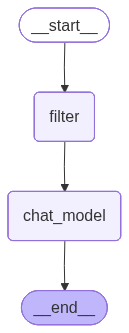

In [12]:
from langchain_core.messages import RemoveMessage

# 过滤节点：仅保留最近 2 条消息，删除更早的历史
# 使用 RemoveMessage + add_messages 归约器的组合语义
def filter_messages(state: MessagesState):
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

# 调用节点：将过滤后的消息传给模型
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"])]}

# 构建图：START -> filter -> chat_model -> END
builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# 可视化
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
# Message list with a preamble
messages = [AIMessage("你好。", name="Bot", id="1")]
messages.append(HumanMessage("你好。", name="Lance", id="2"))
messages.append(AIMessage("你之前说你在研究海洋哺乳动物，对吗？", name="Bot", id="3"))
messages.append(HumanMessage("是的，我知道鲸鱼。但我还应该了解哪些其他的？", name="Lance", id="4"))

# Invoke
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

你之前说你在研究海洋哺乳动物，对吗？
================================ Human Message =================================
Name: Lance

是的，我知道鲸鱼。但我还应该了解哪些其他的？
================================== Ai Message ==================================

除了鲸鱼之外，还有几种主要的海洋哺乳动物值得了解。以下是一些类别和例子：

### 1. **海豚和鼠海豚**
   - **海豚**：海豚属于齿鲸家族，种类众多，比如瓶鼻海豚、虎鲸（虽然我们常叫它“杀人鲸”，但其实是大型海豚）。它们聪明、社交性强。
   - **鼠海豚**：鼠海豚与海豚类似，但通常体型更小，头部样子更圆。

### 2. **海豹**
   - 海豹是鳍足动物的一部分，主要生活在寒冷地区，能够在水中和陆地上活动。
   - 比如：斑海豹（常见于北半球）、南极的豹海豹。

### 3. **海狮与北极熊**
   - **海狮**：身体柔软、灵活，可以在陆地上移动，叫声非常响亮，比如加州海狮。
   - **北极熊**：虽然北极熊是陆地哺乳动物，但它们被认为与海洋高度相关，因为其捕食主要依赖北极冰和水域。

### 4. **儒艮和海牛**
   - **儒艮**：美人鱼的传说可能就源自它们。它们吃海草，生活在浅水近岸地区。
   - **海牛**（比如佛罗里达海牛）：与儒艮类似，但体型更大，分布范围较广。

### 5. **海獭**
   - 海獭是一种小型哺乳动物，喜欢漂浮在水面，用石头敲击贝壳来获取食物。
   - 虽然动作可爱，但它们其实是生态的重要一环，促进海洋生物多样性。

### 6. **鲸类**
   - 除了常见的座头鲸、蓝鲸，你还可以了解其他种类，比如抹香鲸（深海潜水猎食墨鱼）和白鲸（“海中的金丝雀”，因会发出“歌声”）。

这些动物都在不同的海洋生态系统中扮演着重要的角色。你可以研究它们的饮食、栖息地、社会行为以及

## 过滤消息（Filtering Messages）

如果你不需要或不想修改图状态本身，可以只对“传入聊天模型的消息列表”进行过滤。

例如，仅把最后一条消息传给模型：`llm.invoke(messages[-1:])`。

图可视化：


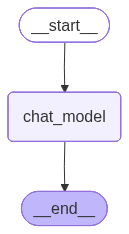

✅ 图渲染成功！


In [14]:
# 仅传入“最后一条消息”给模型，避免把整段历史都送入模型
# 注意：这种方式适用于上下文依赖较弱的问答；若强依赖上下文，请考虑裁剪（trim）而非简单过滤
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

# 构建图
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# 展示图结构
# 图可视化
print("图可视化：")

# 方案1：尝试使用 Pyppeteer 本地渲染（推荐）
try:
    # 可视化：通过 Mermaid 渲染图结构
    display(Image(graph.get_graph().draw_mermaid_png()))
    print("✅ 图渲染成功！")
except Exception as e:
    print(f"❌ Pyppeteer 渲染失败: {e}")
    
    # 方案2：显示 Mermaid 文本格式
    print("\n📝 图结构（Mermaid 文本格式）：")
    print("=" * 50)
    mermaid_text = graph.get_graph().draw_mermaid()
    print(mermaid_text)
    print("=" * 50)
    
    # 方案3：显示图的节点和边信息
    print("\n🔗 图结构信息：")
    print("节点:", list(graph.get_graph().nodes.keys()))
    print("边:", list(graph.get_graph().edges))
    
    # 方案4：提供手动渲染说明
    print("\n💡 手动渲染说明：")
    print("1. 复制上面的 Mermaid 文本")
    print("2. 访问 https://mermaid.live/")
    print("3. 粘贴文本到编辑器中查看图形")
    print("4. 或者使用支持 Mermaid 的 Markdown 编辑器")

接下来，我们把现有消息列表继续扩展：先加入上面的 LLM 回复，再追加一个追问。

In [15]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"再告诉我一些关于独角鲸的事吧！", name="Lance"))

In [16]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

你好。
================================ Human Message =================================
Name: Lance

你好。
================================== Ai Message ==================================
Name: Bot

你之前说你在研究海洋哺乳动物，对吗？
================================ Human Message =================================
Name: Lance

是的，我知道鲸鱼。但我还应该了解哪些其他的？
================================== Ai Message ==================================

除了鲸鱼之外，还有几种主要的海洋哺乳动物值得了解。以下是一些类别和例子：

### 1. **海豚和鼠海豚**
   - **海豚**：海豚属于齿鲸家族，种类众多，比如瓶鼻海豚、虎鲸（虽然我们常叫它“杀人鲸”，但其实是大型海豚）。它们聪明、社交性强。
   - **鼠海豚**：鼠海豚与海豚类似，但通常体型更小，头部样子更圆。

### 2. **海豹**
   - 海豹是鳍足动物的一部分，主要生活在寒冷地区，能够在水中和陆地上活动。
   - 比如：斑海豹（常见于北半球）、南极的豹海豹。

### 3. **海狮与北极熊**
   - **海狮**：身体柔软、灵活，可以在陆地上移动，叫声非常响亮，比如加州海狮。
   - **北极熊**：虽然北极熊是陆地哺乳动物，但它们被认为与海洋高度相关，因为其捕食主要依赖北极冰和水域。

### 4. **儒艮和海牛**
   - **儒艮**：美人鱼的传说可能就源自它们。它们吃海草，生活在浅水近岸地区。
   - **海牛**（比如佛罗里达海牛）：与儒艮类似，但体型更大，分布范围较广。

### 5. **海獭**
   - 海獭是一种小

In [17]:
# Invoke, using message filtering
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

你好。
================================ Human Message =================================
Name: Lance

你好。
================================== Ai Message ==================================
Name: Bot

你之前说你在研究海洋哺乳动物，对吗？
================================ Human Message =================================
Name: Lance

是的，我知道鲸鱼。但我还应该了解哪些其他的？
================================== Ai Message ==================================

除了鲸鱼之外，还有几种主要的海洋哺乳动物值得了解。以下是一些类别和例子：

### 1. **海豚和鼠海豚**
   - **海豚**：海豚属于齿鲸家族，种类众多，比如瓶鼻海豚、虎鲸（虽然我们常叫它“杀人鲸”，但其实是大型海豚）。它们聪明、社交性强。
   - **鼠海豚**：鼠海豚与海豚类似，但通常体型更小，头部样子更圆。

### 2. **海豹**
   - 海豹是鳍足动物的一部分，主要生活在寒冷地区，能够在水中和陆地上活动。
   - 比如：斑海豹（常见于北半球）、南极的豹海豹。

### 3. **海狮与北极熊**
   - **海狮**：身体柔软、灵活，可以在陆地上移动，叫声非常响亮，比如加州海狮。
   - **北极熊**：虽然北极熊是陆地哺乳动物，但它们被认为与海洋高度相关，因为其捕食主要依赖北极冰和水域。

### 4. **儒艮和海牛**
   - **儒艮**：美人鱼的传说可能就源自它们。它们吃海草，生活在浅水近岸地区。
   - **海牛**（比如佛罗里达海牛）：与儒艮类似，但体型更大，分布范围较广。

### 5. **海獭**
   - 海獭是一种小

图状态中仍然保存着全部消息。

不过，从 LangSmith 的追踪可以看到：模型实际调用时只使用了最后一条消息。

https://smith.langchain.com/o/7bfa9385-4ac5-468a-a06c-ffd7dbac42ec/projects/p/27f0e396-e7ab-4eac-9501-8df28b729149?timeModel=%7B%22duration%22%3A%227d%22%7D&peek=a259df5e-be5d-44ff-80cd-0817ff45db32&peeked_trace=bb929d45-e3a6-4a4a-a1c5-4f34c3860f47

![image-20251004065444998](https://cdn.jsdelivr.net/gh/Fly0905/note-picture@main/imag/202510040654664.png)

## 裁剪消息（Trim Messages）

另一种方式是按令牌数对历史进行“裁剪”（trim）：即通过 [`trim_messages`](https://python.langchain.com/v0.2/docs/how_to/trim_messages/#getting-the-last-max_tokens-tokens) 限制用于本次回复的历史消息总令牌数。

- 过滤（filter）：只是事后挑选一部分消息传给模型；
- 裁剪（trim）：从头/尾等策略出发，严格限制可用的历史上下文所占令牌数。

下面演示如何使用 `trim_messages`。

图可视化：


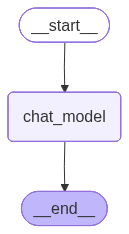

✅ 图渲染成功！


In [18]:
from langchain_core.messages import trim_messages

# 节点：对“历史消息”按令牌数进行裁剪，再调用模型
# - max_tokens：历史消息允许占用的最大 token 数
# - strategy：裁剪策略（"last" 表示优先保留靠后的消息）
# - token_counter：用于估算 token 数的模型或计数器
# - allow_partial：为 False 时，不会截断单条消息的一部分（保证每条消息的完整性）
def chat_model_node(state: MessagesState):
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o"),
            allow_partial=False,
        )
    return {"messages": [llm.invoke(messages)]}

# 构建图
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()


# 展示图结构
# 图可视化
print("图可视化：")

# 方案1：尝试使用 Pyppeteer 本地渲染（推荐）
try:
    # 可视化：通过 Mermaid 渲染图结构
    display(Image(graph.get_graph().draw_mermaid_png()))
    print("✅ 图渲染成功！")
except Exception as e:
    print(f"❌ Pyppeteer 渲染失败: {e}")
    
    # 方案2：显示 Mermaid 文本格式
    print("\n📝 图结构（Mermaid 文本格式）：")
    print("=" * 50)
    mermaid_text = graph.get_graph().draw_mermaid()
    print(mermaid_text)
    print("=" * 50)
    
    # 方案3：显示图的节点和边信息
    print("\n🔗 图结构信息：")
    print("节点:", list(graph.get_graph().nodes.keys()))
    print("边:", list(graph.get_graph().edges))
    
    # 方案4：提供手动渲染说明
    print("\n💡 手动渲染说明：")
    print("1. 复制上面的 Mermaid 文本")
    print("2. 访问 https://mermaid.live/")
    print("3. 粘贴文本到编辑器中查看图形")
    print("4. 或者使用支持 Mermaid 的 Markdown 编辑器")

In [19]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"告诉我海豚在哪里生活！", name="Lance"))

In [20]:
# Example of trimming messages
trim_messages(
            messages,
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o"),
            allow_partial=False
        )

[HumanMessage(content='告诉我海豚在哪里生活！', additional_kwargs={}, response_metadata={}, name='Lance')]

In [21]:
# Invoke, using message trimming in the chat_model_node
messages_out_trim = graph.invoke({'messages': messages})

In [22]:
for m in messages_out_trim['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

你好。
================================ Human Message =================================
Name: Lance

你好。
================================== Ai Message ==================================
Name: Bot

你之前说你在研究海洋哺乳动物，对吗？
================================ Human Message =================================
Name: Lance

是的，我知道鲸鱼。但我还应该了解哪些其他的？
================================== Ai Message ==================================

除了鲸鱼之外，还有几种主要的海洋哺乳动物值得了解。以下是一些类别和例子：

### 1. **海豚和鼠海豚**
   - **海豚**：海豚属于齿鲸家族，种类众多，比如瓶鼻海豚、虎鲸（虽然我们常叫它“杀人鲸”，但其实是大型海豚）。它们聪明、社交性强。
   - **鼠海豚**：鼠海豚与海豚类似，但通常体型更小，头部样子更圆。

### 2. **海豹**
   - 海豹是鳍足动物的一部分，主要生活在寒冷地区，能够在水中和陆地上活动。
   - 比如：斑海豹（常见于北半球）、南极的豹海豹。

### 3. **海狮与北极熊**
   - **海狮**：身体柔软、灵活，可以在陆地上移动，叫声非常响亮，比如加州海狮。
   - **北极熊**：虽然北极熊是陆地哺乳动物，但它们被认为与海洋高度相关，因为其捕食主要依赖北极冰和水域。

### 4. **儒艮和海牛**
   - **儒艮**：美人鱼的传说可能就源自它们。它们吃海草，生活在浅水近岸地区。
   - **海牛**（比如佛罗里达海牛）：与儒艮类似，但体型更大，分布范围较广。

### 5. **海獭**
   - 海獭是一种小

最后，我们再通过 LangSmith 追踪看看本次模型调用的实际入参情况：

![image-20251004070203440](https://cdn.jsdelivr.net/gh/Fly0905/note-picture@main/imag/202510040702041.png)